In [1]:
def effective_order_of_method(U,r,
                              lable = 'График эффективного порядка',
                              draw_flag = False):
    try:
        
        if len(U) < 3:
            raise IndexError()
      #  exp_p = [ (U[i]-U[i+1])/(U[i+1]-U[i+2]) for i in range(len(U)-2) ]
        exp_p = [ (U[i+2]-U[i+1])/(U[i+1]-U[i]) for i in range(len(U)-2) ]
        p = np.log(exp_p)/np.log(r)
        

        if draw_flag:
            plt.figure(figsize=(10,8))
            plt.plot(range(1,len(p)+1), p,'b*-')    
            plt.grid()
            plt.xlabel('№ triple',fontsize=16)
            plt.ylabel(r'$p$',fontsize=16)
            plt.title(lable,fontsize=15)
            plt.show()
            
        return p
        
    except IndexError:
        print('More than three values are required\n',traceback.format_exc())
        return None

### №1
### Записать расчетные формулы для схемы Кутта, если
### \begin{equation} \nonumber
	\mathbf{A} = 
		\begin{pmatrix}
		0 & 0 & 0 & 0 \\
		1/2 & 0 & 0 & 0 \\
		0 & 1/2 & 0 & 0 \\
		0 & 0 & 1 & 0 \\
		\end{pmatrix},
	\qquad
	\mathbf{a} = 
		\begin{pmatrix}
		0 \\
		1/2 \\
		1/2 \\
		1 \\
		\end{pmatrix},
	\qquad
	\mathbf{b} = 
		\begin{pmatrix}
		1/6 \\
		1/3 \\
		1/3 \\
		1/6 \\
		\end{pmatrix}^T.
\end{equation}

### \begin{split}
		\mathbf{u}_{n+1} = \mathbf{u}_n + \tau_n \sum_{k=1}^{4} b_k \boldsymbol{\omega}_k, 
	\qquad
\tau_n = t_{n+1} - t_n; \\
        \boldsymbol{\omega}_1 = \mathbf{f} \left( u_n + , t_n  \right), \\
	    	\boldsymbol{\omega}_2 = \mathbf{f} \left( u_n + 0.5 \tau_n \omega_1 , t_n + 0.5 \tau_n  \right), \\
            \boldsymbol{\omega}_3 = \mathbf{f} \left( u_n + 0.5 \tau_n \omega_2 , t_n + 0.5 \tau_n   \right), \\
            \boldsymbol{\omega}_4 = \mathbf{f} \left( u_n + \tau_n \omega_3 , t_n + 0.5 \tau_n  \right), \\
            	\end{split} 

### №2
### Перейти к длине дуги в задаче
### \begin{equation} \nonumber
	\begin{cases}
		\displaystyle \frac{du}{dt} = u^2 + t^2 \\
		u(t_0) = u_0
	\end{cases}.
\end{equation}

### №3
### Реализовать схему Кутта на компьютере
### 1. $y = u + t^2 + 1$; $u_0 = 0.5;$
### 2. 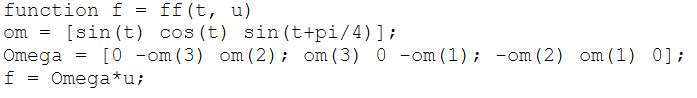

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def Runge_Kutta_45(F, u0, t):
    
    dim = len(u0)
    Y = np.zeros(( len(t), dim) )
    Y[0,:] = u0
    
    tau = 0
        
    for i,tt in enumerate(t[1:]):
       
        tt = t[i]
        dt = t[i+1] - tt
        
                
        W1 = F(tt, Y[tau])            
        
        W2 = F(tt + dt / 2.0, [Y[tau, i]+ W1[i] * (dt / 2.0) for i in range(dim)])
                
        W3 = F(tt + dt / 2.0, [Y[tau, i] + W2[i] * (dt / 2.0) for i in range(dim)])
              
        W4 = F(tt + dt, [Y[tau, i] + W3[i] * dt  for i in range(dim)])
                
        
        Y[tau + 1, :] = [Y[tau, i] + dt / 6.0 * (W1[i] + 2.0 * W2[i] + 2.0 * W3[i] + W4[i]) for i in range(dim)]
        
        tau += 1
        
    return Y

In [3]:
def simple_solver(f, u0, t):
    
    u = np.array([u0]*len(t))
    
    for i,ui in enumerate(u[:-1]):
        
        tau = t[i+1] - t[i]
        w1 = f(ui,t[i])
        w2 = f(ui + tau*w1/2, t[i] + tau/2)
        w3 = f(ui + tau*w2/2, t[i] + tau/2)
        w4 = f(ui + tau*w3, t[i] + tau)
        u[i+1] = ui + tau * (w1 + 2*w2 +2*w3 + w4)/6
        
    return u,t

def effective_p(U2,U1,U0,r):
    return np.log((U2-U1)/(U1-U0))/np.log(r)

### 1.

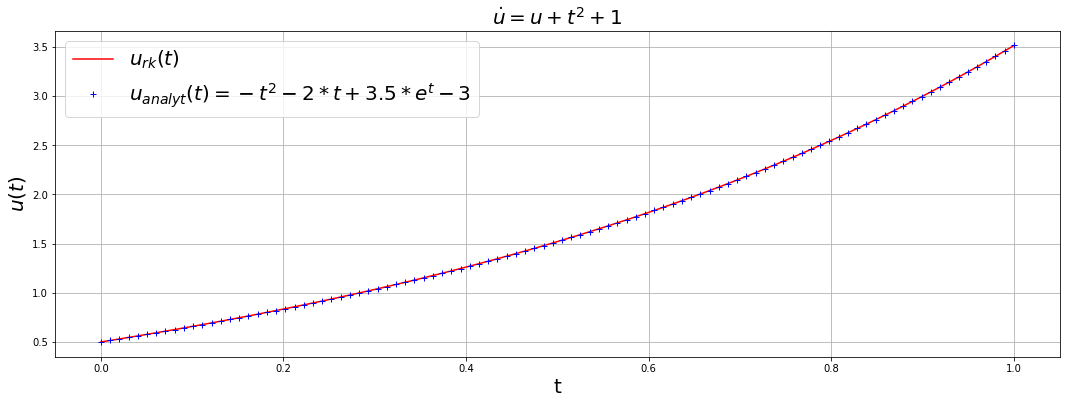

In [4]:
def task_1(t, y):
    return y + t**2 +1

def task_11(y, t):
    return y + t**2 +1
   
def shift_sol(t):
    shift = 1
    return - t**2 -2 * t + 3.5 * np.exp(t) - 3

t = np.linspace(0, 1, 100)
rk = Runge_Kutta_45(task_1,  [0.5], t)
#print(rk)
plt.figure(figsize=(18, 6))
    
plt.plot(t, rk[:,0], 'r', label = r'$u_{rk}(t)$'  )
plt.plot(t, shift_sol(t),'b+', label = r'$u_{analyt}(t) = - t^2 -2 * t + 3.5 * e^t - 3$')
    
plt.grid()
plt.xlabel('t', fontsize = 20)
plt.ylabel(r'$u(t)$', fontsize = 20)
plt.legend(loc = 'best', fontsize=20)

plt.title( r'$\dot{u} = u + t^2 + 1 $', fontsize=20)
plt.show()

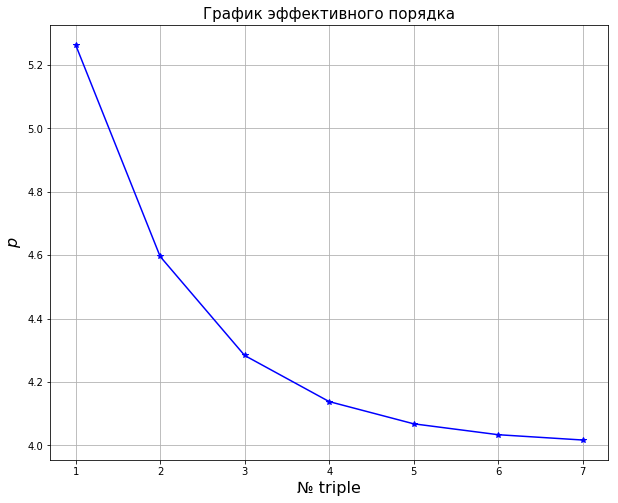

In [13]:
r = 1/2

task1_values = [ Runge_Kutta_45(task_1,  [0.5], np.linspace(0, 1, 2**i)) for i in range(1, 10)]

last_item = [task1_values[i][-1] for i in range(len(task1_values))]

task1_eff_values = effective_order_of_method(last_item, r, draw_flag=True)

### 2.

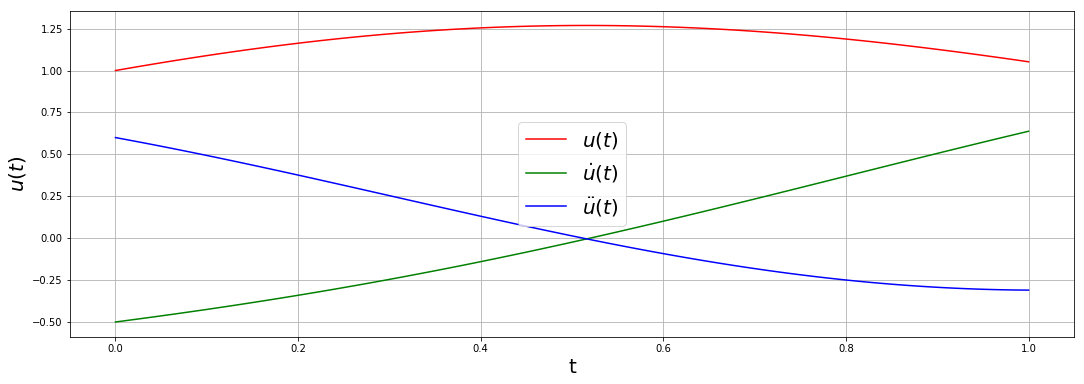

In [6]:
def task_2(t, u):
    om = np.array([np.sin(t), np.cos(t), np.sin(t + np.pi/4)])
    Omega = np.array([ [0, -om[2], om[1]], [om[2], 0, -om[0]], [ -om[1], om[0], 0] ])
    return np.dot(Omega, u)
    
def shift_sol(t):
    shift = 1
    return - t**2 -2 * t + 3.5 * np.exp(t) - 3


N = [100]
colors =['b', 'g-.', 'r--']

plt.figure(figsize=(18, 6))
plt.grid()
plt.xlabel('t', fontsize = 20)
plt.ylabel(r'$u(t)$', fontsize = 20)

for n, c in zip(N, colors):
    t = np.linspace(0, 1, n, endpoint=True)
    u0 = [1, -0.5, 0.6]

    rk = Runge_Kutta_45(task_2, u0, t)
   
    plt.plot(t, rk[:,0], 'r', label = r'$u(t)$' )
    plt.plot(t, rk[:,1], 'g', label = r'$\dot{u}(t)$')
    plt.plot(t, rk[:,2], 'b', label = r'$\ddot{u}(t)$')

 
plt.legend(loc = 'best', fontsize=20)    
plt.show()

## №4
### Реализовать явную схему Рунге-Кутты в общем виде. Для отладки использовать 7-стадийную схему Хаммуда 6 порядка

In [7]:
def explicit_rk(F, u0, t, A, b, c):
   
    try:
        if np.shape(A)[0] != np.shape(A)[1] != len(b) != len(c):
            raise IndexError()
                    
        dim = len(u0)
        Y = np.zeros(( len(t), dim) )
        Y[0,:] = u0
        s = len(b)

        
        for i,tt in enumerate(t[1:]):
            
            dt = t[i+1] - t[i]
                        
            W = np.zeros((s, dim))
            W[0, :] = F(t[i], Y[i])
            
            for ss in range(1, s):
                W[ss, :] = F( t[i] + dt*c[ss] , Y[i] + dt*np.dot( A[ss][:ss], W[:ss] ) ) 
          
            Y[i + 1, :] =  Y[i] + dt * np.dot( b, W )
                            
        return Y
            
        
    except IndexError:
        print('Check arrays dimension\n', traceback.format_exc())
        return None    

### 7-стадийная схема Хаммуда 6 порядка

In [14]:
butcher = [ [0, 0, 0, 0, 0, 0, 0],
            [4/7, 0, 0, 0, 0, 0, 0],
            [115/112, -5/16, 0, 0, 0, 0, 0],
            [589/630, 5/18, -16/45, 0, 0, 0, 0],
    [229/1200-29/6000*5**0.5, 119/240-187/1200*5**0.5, - 14/75+34/375*5**0.5, -3/100*5**0.5, 0, 0, 0],
    [71/2400-587/12000*5**0.5, 187/480-391/2400*5**0.5, -38/75+26/375*5**0.5, 27/80-3/400*5**0.5, (1+5**0.5)/4, 0, 0],
[-49/480+43/160*5**0.5, -425/96+51/32*5**0.5, 52/15-4/5*5**0.5, -27/16+3/16*5**0.5, 5/4 - 3/4*5**0.5, 5/2-0.5*5**0.5, 0]]
           
a = [0, 4/7, 5/7, 6/7, (5-5**0.5)/10, (5+5**0.5)/10, 1]
b = [1/12, 0, 0, 0, 5/12, 5/12, 1/12]

t = np.linspace(0, 1, 100)

### 4-стадийная схема

In [9]:
butcher = [[0,0,0,0],
          [1/2,0,0,0],
         [0,1/2,0,0],
          [0,0,1,0]]

a = [0, 1/2, 1/2, 1]
b = [1/6, 1/3, 1/3, 1/6]

t = np.linspace(0, 1, 100)

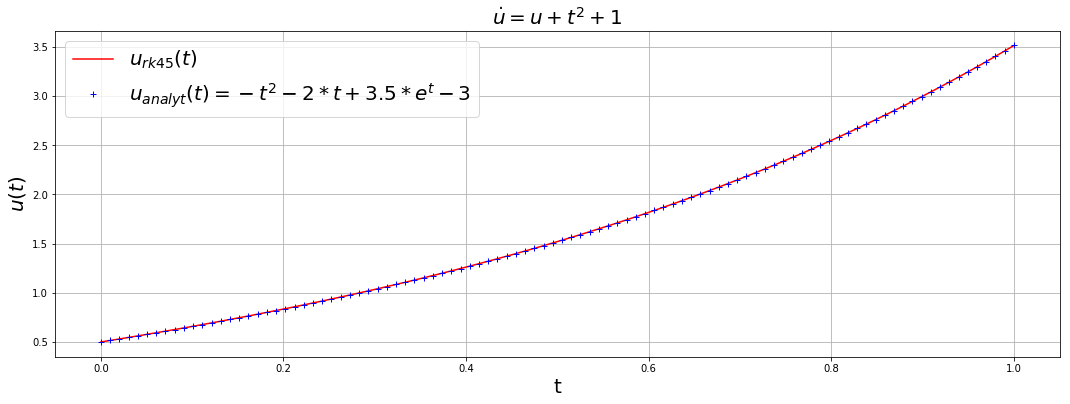

In [15]:
rk = explicit_rk(task_1,  [0.5], t, butcher, b, a)

plt.figure(figsize=(18, 6))
    
plt.plot(t, rk[:,0], 'r', label = r'$u_{rk45}(t)$'  )
plt.plot(t, shift_sol(t),'b+', label = r'$u_{analyt}(t) = - t^2 -2 * t + 3.5 * e^t - 3$')
    
plt.grid()
plt.xlabel('t', fontsize = 20)
plt.ylabel(r'$u(t)$', fontsize = 20)
plt.legend(loc = 'best', fontsize=20)

plt.title( r'$\dot{u} = u + t^2 + 1 $', fontsize=20)
plt.show()

C:\Users\Aleksandr\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


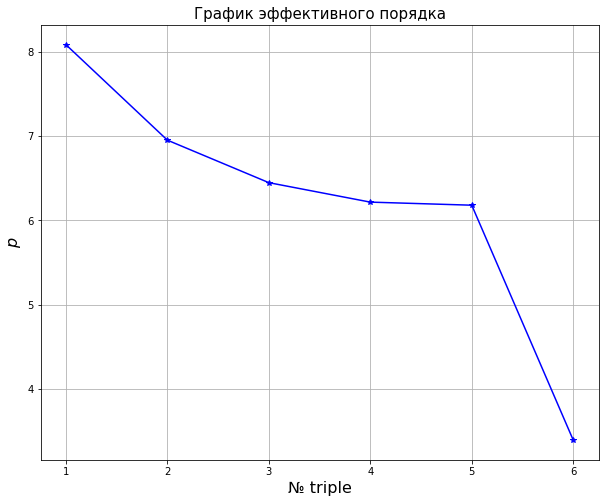

In [16]:
r = 2
task1_values = [ explicit_rk(task_1,  [0.5], np.linspace(0, 1,  r**i), butcher, b, a) for i in range(1,10)]

last_item = [task1_values[i][-1] for i in range(len(task1_values))]

task1_eff_values = effective_order_of_method(last_item, 1/r, draw_flag=True)

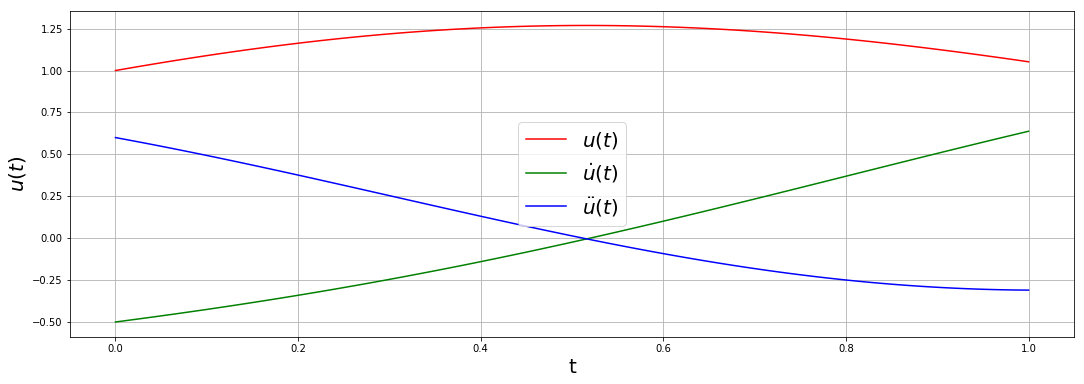

In [12]:
N = [100]
colors =['b', 'g-.', 'r--']

plt.figure(figsize=(18, 6))
plt.grid()
plt.xlabel('t', fontsize = 20)
plt.ylabel(r'$u(t)$', fontsize = 20)

for n, c in zip(N, colors):
    t = np.linspace(0, 1, n, endpoint=True)
    u0 = [1, -0.5, 0.6]

    rk = explicit_rk(task_2,  u0, t, butcher, b, a)
   
    plt.plot(t, rk[:,0], 'r', label = r'$u(t)$' )
    plt.plot(t, rk[:,1], 'g', label = r'$\dot{u}(t)$')
    plt.plot(t, rk[:,2], 'b', label = r'$\ddot{u}(t)$')
 
plt.legend(loc = 'best', fontsize=20)    
plt.show()